<a href="https://colab.research.google.com/github/robert-maddoxjr-gmail-com/Maddog.github.io/blob/master/low_code_foodhub_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import Python Libraries (dependencies)

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
# import the dataset

from google.colab import files
uploaded = files.upload()

Saving foodhub_order.csv to foodhub_order (1).csv


Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Upgrade Seaborn

!pip install --upgrade seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
# Read the data
df = pd.read_csv('foodhub_order.csv')

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# Change the cost_of_the_order column to a float

df['cost_of_the_order'] = df['cost_of_the_order'].astype(float)

In [ ]:
# Change delivery_time column to a float

df['delivery_time'] = df['delivery_time'].astype(float)

In [ ]:
# Change food_preparation_time column to a float

df['food_preparation_time'] = df['food_preparation_time'].astype(float)

#The next 5 questions are an analysis of the data

In [ ]:
# Question 1
# how many rows and columns are present in the data?

# Get the number of rows and columns
num_rows = df.shape[0]
num_columns = df.shape[1]

# print the results

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1898
Number of columns: 9


There are 1898 rows and 9 columns is this database

In [ ]:
# Question 2
# What are the datatypes of the different columns in the dataset?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   float64
 8   delivery_time          1898 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 133.6+ KB


order_id is an integer,

customer_id is an integer

restaurant_name is an object

cuisine_type is an object

cost_of_the_order is a float

day_of_the_week is an object

rating is an object

food_preparation_time is a float

delivery_time is a float

In [ ]:
# Question 3
# Are there any missing values in the data?
# If yes, treat them using an appropriate method.

# Checking for missing values in the data

#Write the appropriate function to print the sum of null values for each column
null_mask = df.isnull()

print(null_mask.sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


There are no missing values in this data base

In [ ]:
# Question 4: Check the statistical summary of the data. What is the minimum, average
# and maximum time it takes for food to be prepared once an order is placed?

# Get the summary statistics of the numerical data
## Write the appropriate function to print the statitical summary of the data
# (Hint - you have seen this in the case studies before)
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


The minimum time it takes for food to be prepared once an order is placed is: 20 minutes.

The average time it takes for food to be prepared once an order is placed is: 27.37 minutes.

the Maximum time it takes for food to be prepared once an order is placed is: 35 minutes.

In [ ]:
# Question 5
# How many orders are not rated?

df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

736 orders were not rated

# Univariate Analysis

Question 6

Explore all the variables and provide observations on their distributions.
(Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

*Order ID*

In [ ]:
# check unique order ID

unique_order_ids = df['order_id'].nunique()
print(f"Number of unique order IDs: {unique_order_ids}")

Number of unique order IDs: 1898


There are 1898 unique order IDs

Customer ID

In [ ]:
# check unique customer ID

unique_customer_ids = df['customer_id'].nunique()
print(f"Number of unique customer IDs: {unique_customer_ids}")

Number of unique customer IDs: 1200


There are 1200 unique Customer IDs

Restaurant name

In [ ]:
# check unique Restaurant Name

unique_restaurant_names = df['restaurant_name'].nunique()
print(f"Number of unique restaturant names: {unique_restaurant_names}")

Number of unique restaturant names: 178


There are 178 unique restaurant names

Cuisine type

There are 19 unique cuisine types

Cost of the Order

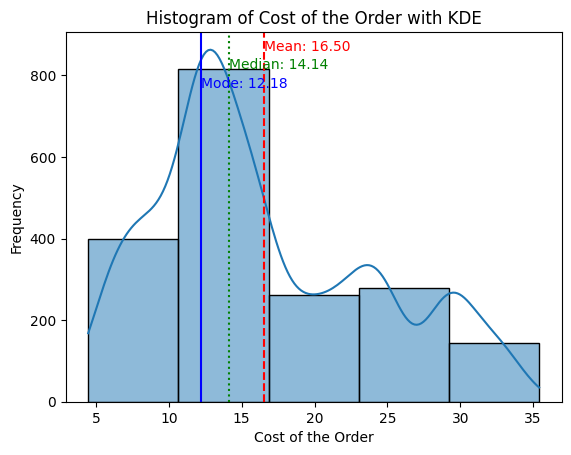

In [ ]:
# Create a Histogram to

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'cost_of_the_order' is the column of interest

# Calculate statistics
mean_value = df['cost_of_the_order'].mean()
median_value = df['cost_of_the_order'].median()
mode_value = df['cost_of_the_order'].mode() [0]

# Plot histogram with KDE
sns.histplot(data=df, x='cost_of_the_order', bins=5, kde=True)
plt.title("Histogram of Cost of the Order with KDE")
plt.xlabel("Cost of the Order")
plt.ylabel("Frequency")

# Add a vertical line for the mean
plt.axvline(mean_value, color='r', linestyle='--')
plt.text(mean_value, plt.ylim()[1]*0.95, f'Mean: {mean_value:.2f}', color='r')

# Add a vertical line for the median
plt.axvline(median_value, color='g', linestyle=':')
plt.text(median_value, plt.ylim()[1]*0.90, f'Median: {median_value:.2f}', color='g')

# Add a vertcal line for the mode
plt.axvline(mode_value, color='b', linestyle='-')
plt.text(mode_value, plt.ylim()[1]*0.85, f'Mode: {mode_value:.2f}', color='b')

plt.show()

In [ ]:
# check unique Cuisine type

unique_delivery_time = df['delivery_time'].nunique()
print(f"Number of unique cuisine types: {unique_delivery_time}")

Number of unique cuisine types: 19


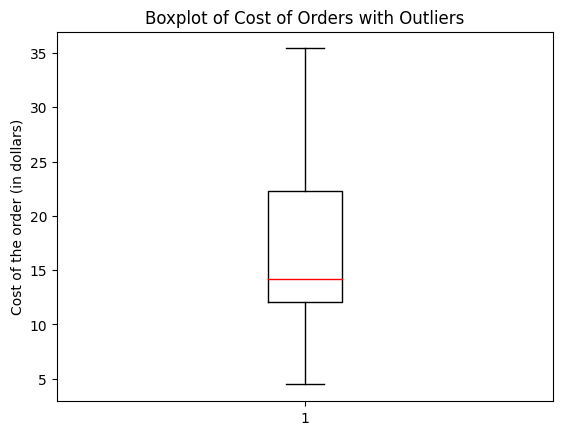

In [ ]:
# Check cost of the order

plt.boxplot(df['cost_of_the_order'], showfliers=True, medianprops=dict(color='red'))
plt.title("Boxplot of Cost of Orders with Outliers")
plt.ylabel("Cost of the order (in dollars)")
plt.show()


The histogram shows that the average cost of the order (Mean) is greater than the median cost indicating that the distribution for the cost of the order is right skewed.

the mode of the distribution indicates that a large chunk of customers prefers to order food that costs around 10 - 12 dollars.

The upper whisker on the box plot, when you make observations starting at the 30 dollar mark indicate that there are few orders that cost greater than 30 dollars.

# Day of the Week

In [ ]:
# check unique day of the week

df['day_of_the_week'].value_counts()


Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

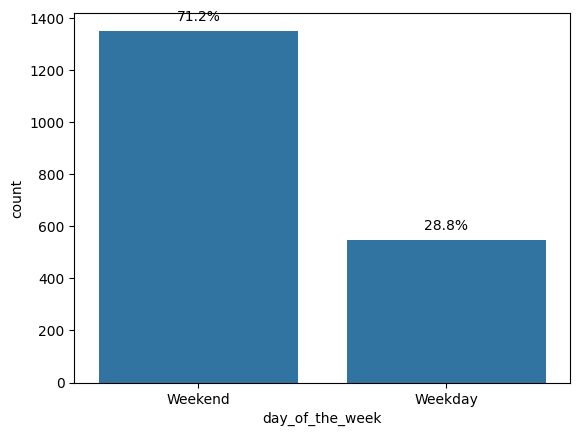

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'day_of_the_week' is the column of interest
ax = sns.countplot(data=df, x='day_of_the_week')

# Calculate the total number of entries (to calculate percentages)
total = len(df['day_of_the_week'])

# Get the current tick locations and labels, and set the percentage text on top of each bar
for p in ax.patches:
    # Calculate percentage and format it
    percentage = f'{100 * p.get_height() / total:.1f}%'
    # Set the annotation on each bar
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

The bar graph indicates that during the weekend 71.2% of customers preferred to order food online.

However, during the week day 28.8% of customers ordered food more than 590 times.

# Rating

In [ ]:
unique_rating = df['rating'].nunique()
print(f"Number of unique rating: {unique_rating}")

Number of unique rating: 4


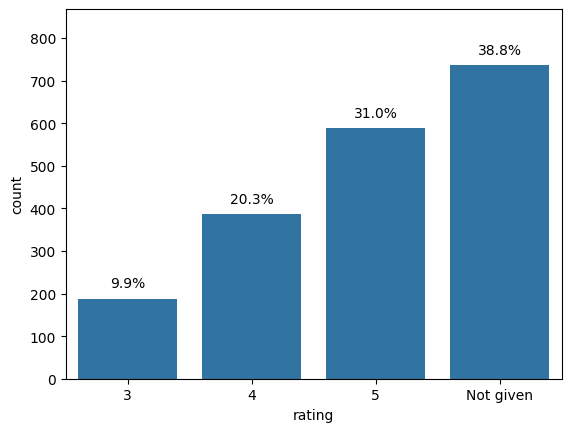

In [ ]:
# Calculate counts for each rating and sort by counts
rating_counts = df['rating'].value_counts().sort_values(ascending=True)  # This sorts the counts in ascending order
sorted_ratings = rating_counts.index  # Extract the sorted rating indices (categories)

# Create the countplot with sorted ratings
ax = sns.countplot(data=df, x='rating', order=sorted_ratings)

# Calculate the total number of entries to find percentages
total = len(df)

# Iterate over each patch (bar) to get its height and calculate the percentage
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X position of the text
    y = height + total*0.01  # Y position of the text, with a small offset

    # Annotate each bar with its percentage, adjusting position slightly above the bar
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Optionally adjust the ylim if needed to make space for the annotations
plt.ylim(0, max(ax.get_ylim()) + total*0.05)

plt.show()

In analyzing the distribution of ratings for orders, the category 'Not given' emerges as the predominant rating, accounting for 38.8% of the total. Meanwhile, only 9.9% of cuisine orders are rated as 3 and 20.3% of cuisine orders receive a rating of 4. Notably, ratings of 5 are given to 31% of the orders, highlighting a significan portion of highly rated cuisine orders.

# Food Preparation time

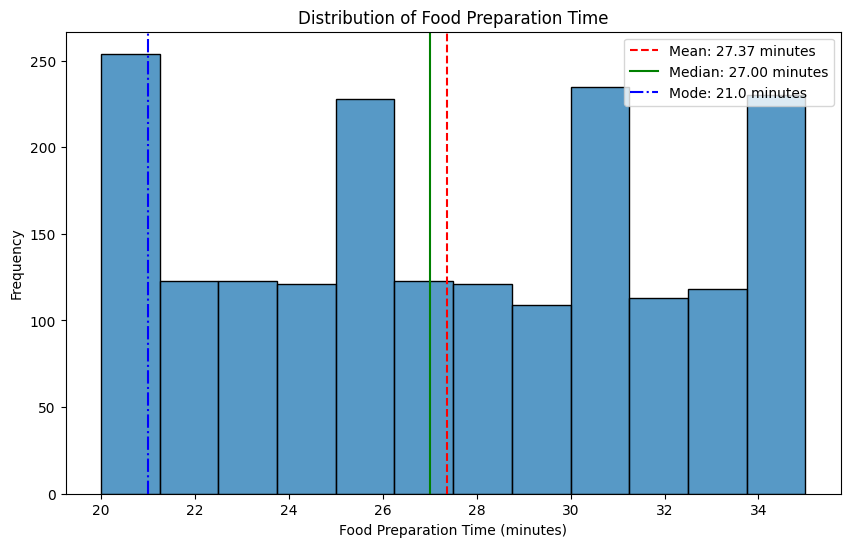

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'food_preparation_time' is your column of interest

# Calculate statistics
mean_val = df['food_preparation_time'].mean()
median_val = df['food_preparation_time'].median()
mode_val = df['food_preparation_time'].mode()[0]  # Pandas mode method

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='food_preparation_time', kde=False)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')

# Add vertical lines for mean, median, and mode
plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f} minutes')
plt.axvline(median_val, color='g', linestyle='-', label=f'Median: {median_val:.2f} minutes')
plt.axvline(mode_val, color='b', linestyle='-.', label=f'Mode: {mode_val} minutes')

# Add a legend to the plot
plt.legend()

plt.show()

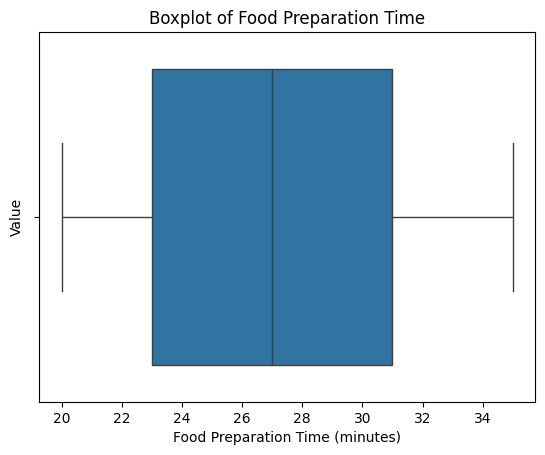

In [ ]:
sns.boxplot(data=df,x='food_preparation_time')
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Value')
plt.show()

The mode for the Histogram is 21 minutes which is the most frequently occuring value for meal preparation in the dataset.  It indicates that a significant number of meals are prepared within 21 minutes making it the most common preparation time.

The Mean(average) food preparation time being 27 minutes suggests that overall, the average time it takes to prepare a meal is 27 minutes when compared to the mode taking the boxplot into consideration that 50% of the more complex meals being prepared require additional preparationtime.

# Delivery time

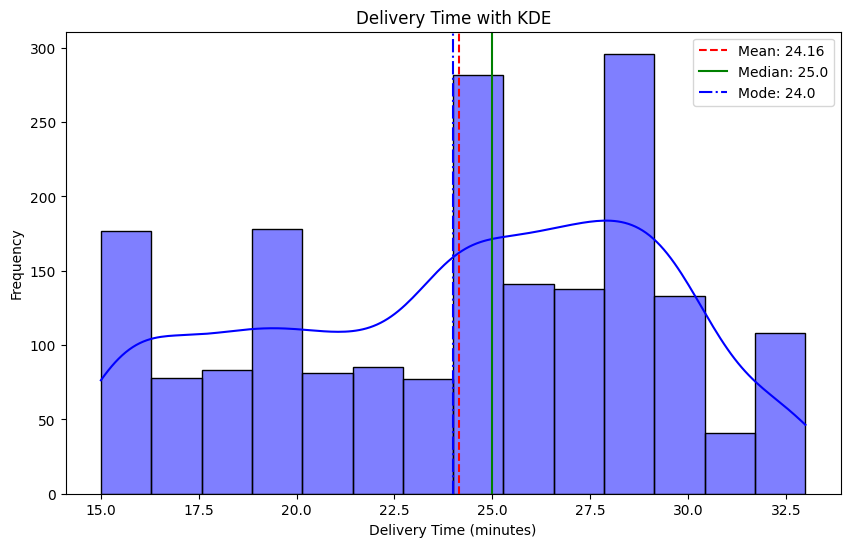

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Calculate statistics
mean_val = df['delivery_time'].mean()
median_val = df['delivery_time'].median()
mode_val = df['delivery_time'].mode()[0]

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='delivery_time', kde=True, color='blue', alpha=0.5)
plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='-', label=f'Median: {median_val}')
plt.axvline(mode_val, color='b', linestyle='-.', label=f'Mode: {mode_val}')

plt.title('Delivery Time with KDE')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

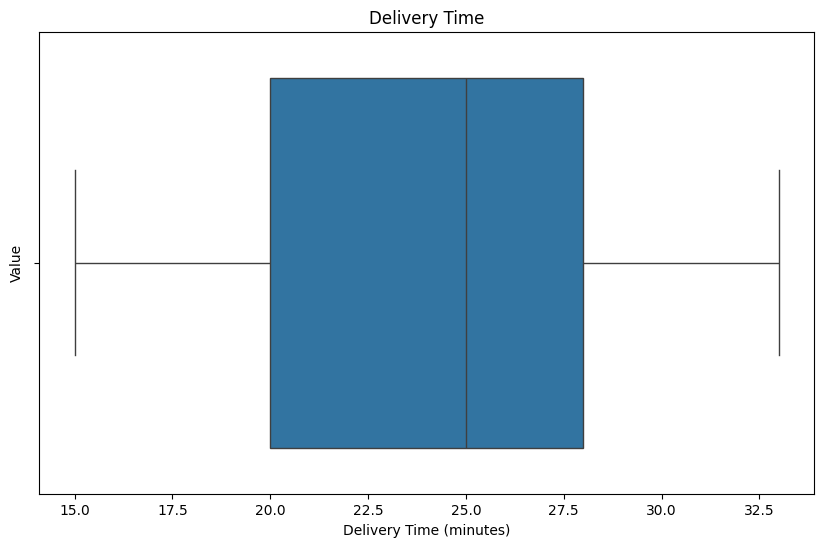

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='delivery_time')
plt.title('Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Value')
plt.show()


The relative close proximity of the Mean, Median and Mode suggest a symmetrical distribution of delivery times.

This indicates that the delivery process is relatively consistent, with most deliveries clustering around a central value. it also suggests that there are fewer outliers or extreme values with fewer instances of unexpectedly long or short delivery times with few disruptions.

The bell curve however is wider than the distance between the Mean, Median and Mode which would indicate that there is room for improvement in delivery time as a wide bell curve suggests variability in the delivery times pointing to occasional deviations from the norm that could be due to a variety of factors outside the control of the delivery service.

the median on both the histogram and boxplot for this data range match suggesting that half of the deliveries are completed in 25 minutes or less while the other half of the deliveries are completed between 25 and 28 minutes. There are no outliers.

# Question 7: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Get top 5 restaurants with highest number of orders

top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_5_restaurants)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


# Question 8: Which is the most popular cuisine on weekends?

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'].isin(['Saturday', 'Sunday'])]

## Complete the code to check unique values for the cuisine type on weekend
most_popular_cuisine = df['cuisine_type'].value_counts().idxmax()
print(f'The most popular cuisine on weekends is: {most_popular_cuisine}')

The most popular cuisine on weekends is: American


# Question 9: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Get orders that cost above 20 dollars

df_greater_than_20 = df[df['cost_of_the_order'] > 20]

# Calculate percentage of such orders in the dataset

percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

Percentage of orders above 20 dollars: 28.03 %


# Question 10: What is the mean order delivery time?

In [ ]:
# Get the mean delivery time

mean_del_time = df['delivery_time']. mean()

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


# Question 11: The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Get the counts of each customer_id

df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

# Multivariate Analysis

# Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

# Cuisine vs Cost of the order

<ipython-input-42-0ab324abf1c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')


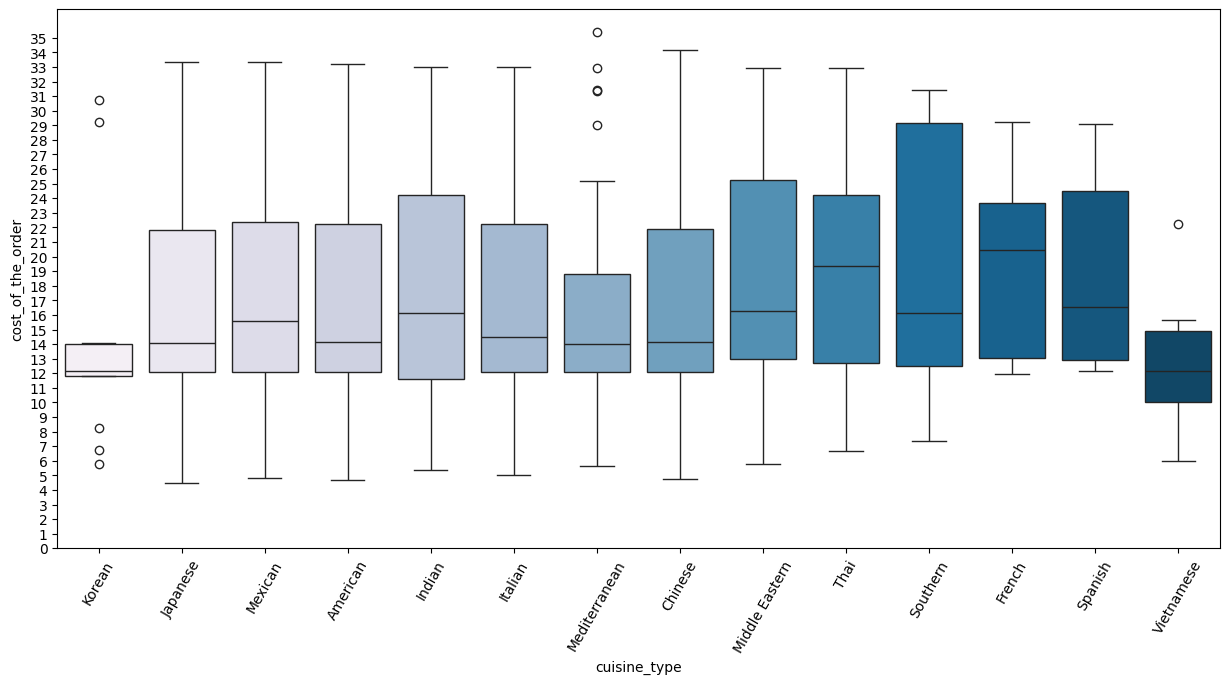

In [ ]:
# Relationship between cost of the order and cuisine type

plt.figure(figsize = (15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)

plt.yticks(range(0, int(df['cost_of_the_order'].max()) + 1, 1))
plt.show()

Vietnamese and Korean cuisines are less expensive than the other 14 cuisines.

the costs for Italian, American, Chinese, and Japanese cuisines are similar at $22.

Outliers are present for Korean, Mediterranean and Vietnamese cuisines.

The most expensive cuisines ae Southern at $29 and Middle Eastern cuisines at

$25.

# Cuisine vs Food Preparation time

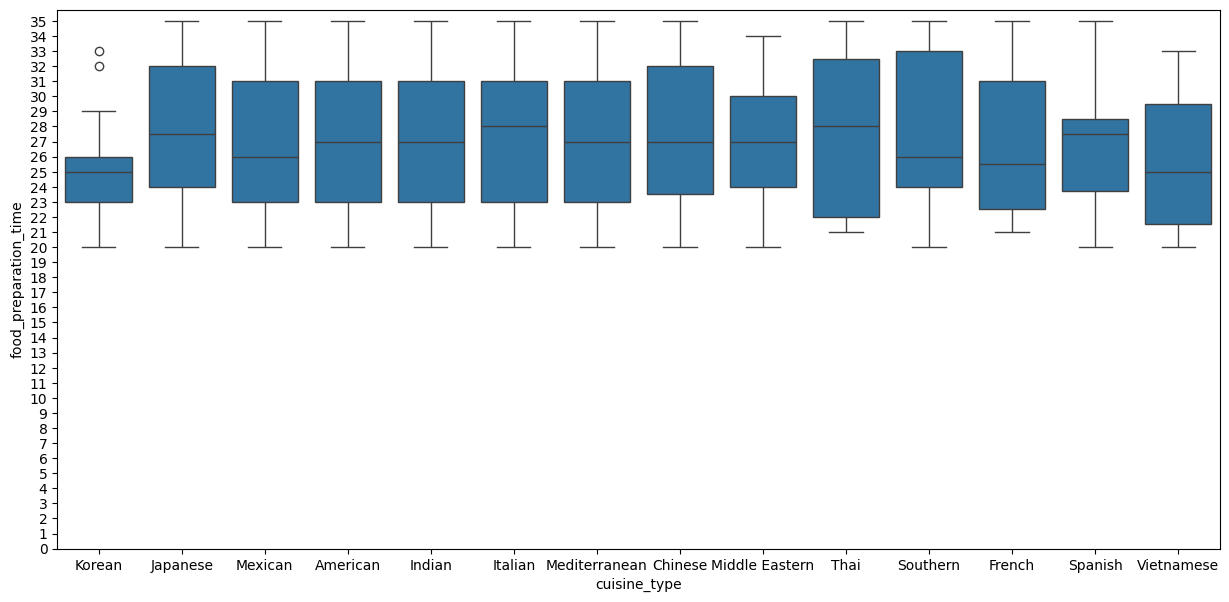

In [ ]:
# Relationship etween food preparation time and cuisine type

plt.figure(figsize = (15,7))
sns.boxplot(x= 'cuisine_type', y='food_preparation_time', data=df)
plt.yticks(range(0, int(df['cost_of_the_order'].max()) + 1, 1))
plt.show()

Food preparation time is very consistent for most of the cuisines
the median food preparationtime lies between 24 and 30 minutes for all the cuisines.

Outliers are present for the food preparation time of Korean cuisine.

Korean cuisine is less preparation time intensive at 26 minutes.

Southern cuisine is the most preparation time intensive 33 minutes.

The next time intensive cuisine is Thai at 32 minutes followed by

Chinese cuisine at 31 minutes.





# Day of the Week vs Delivery time

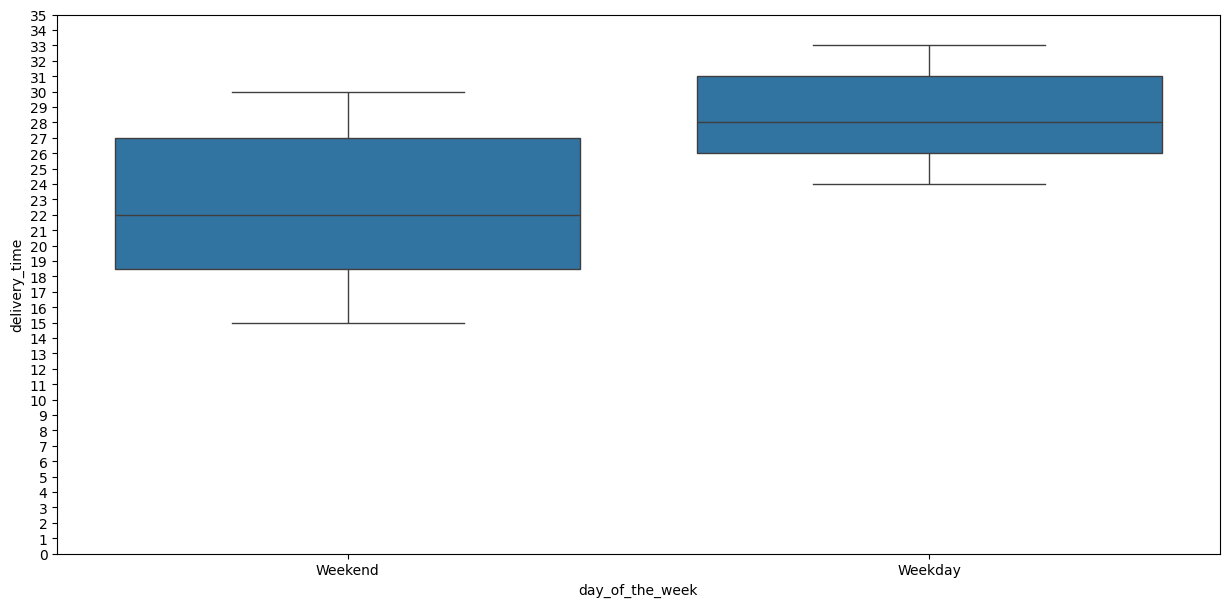

In [ ]:
# Relationship between day of the week and delivery time

plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.yticks(range(0, int(df['cost_of_the_order'].max()) + 1, 1))

plt.show()

Over all delivery times during the weekend are between 15 and 30 minutes. The median delivery times for weekends is 22 minutes, with 50% of the deliveries being made under 22 minutes.

Overall delivery times during the weekday are between 24 and 33 minutes. The median delivery times for weekdays is 28 minutes, with 50% of the deliveries being made under 28 minutes.

M

# Run the below code and write your observations on the revenue generated by the restaurants

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)


restaurant_name
Shake Shack                      3493.0
The Meatball Shop                2092.0
Blue Ribbon Sushi                1857.0
Blue Ribbon Fried Chicken        1628.0
Parm                             1084.0
RedFarm Broadway                  940.0
RedFarm Hudson                    903.0
TAO                               816.0
Han Dynasty                       739.0
Blue Ribbon Sushi Bar & Grill     648.0
Rubirosa                          645.0
Sushi of Gari 46                  630.0
Nobu Next Door                    606.0
Five Guys Burgers and Fries       500.0
Name: cost_of_the_order, dtype: float64

**Observations**

The top five most profitable restaurants are:

1.	Shake Shack with earnings of $3,493.

2.	The Meatball Shop with earnings of $2,092

3.	Blue Ribbon Sushi with earnings of $1,857.

4.	Blue Ribbon Fried Chicken with earnings of $1,628.

5.	Parm with earnings of $ 1,084

Profits for these five restaurants are followed closely by:

RedFarm Broadway with profits of $940.

RedFarm Hudson with profits of $903.


# Rating vs Delivery time

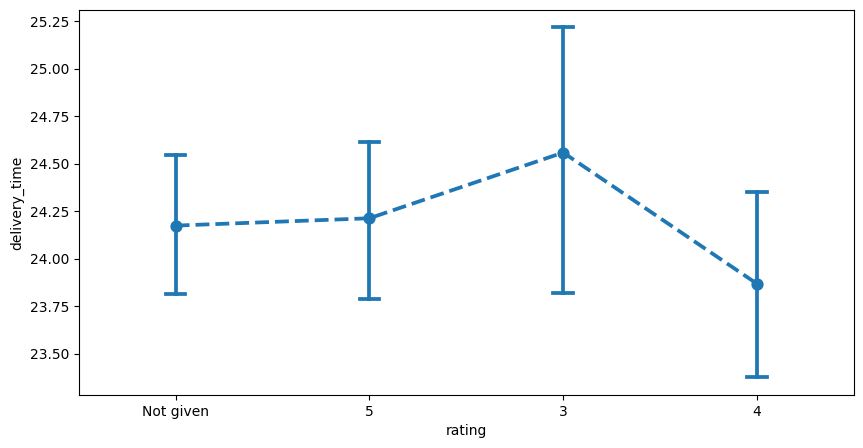

In [ ]:
# Relationship between rating and delivery time

plt.figure(figsize=(10, 5))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df, markers='o', linestyles='--', capsize=0.1)
plt.show()

The average delivery time for orders not rated is approximately 24.15 minutes, meaning that deliveries not rated took an approximate average of 24.15 minutes.

The average delivery time for orders rated as 5 is 24.25 minutes, meaning that deliveries rated as 5 took 2approximately 4.25 minutes.

The average delivery time for orders rated as 3 is approximately 24.60 minutes, meaning that deliveries rated as 3 took approximately 24.60 minutes.

The average delivery time for orders rated as 4 is approximately 23.90 minutes, meaning that deliveries rated as 4 took approximately 23.90 minutes.


# Rating vs Food preparation time

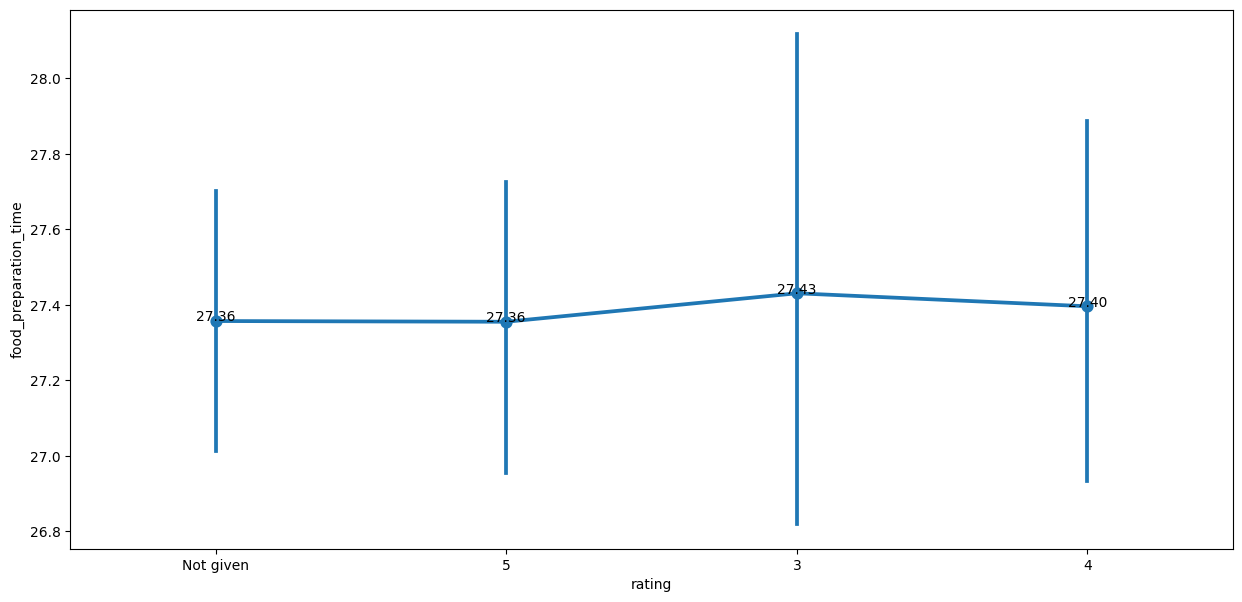

In [ ]:
plt.figure(figsize=(15, 7))
pointplot = sns.pointplot(x='rating', y='food_preparation_time', data=df)
# Calculate mean values for each rating
mean_values = df.groupby('rating')['food_preparation_time'].mean().reset_index()

# Iterate over the calculated mean values to annotate the pointplot
for index, row in mean_values.iterrows():
    plt.text(row['rating'], row['food_preparation_time'], f"{row['food_preparation_time']:.2f}",
             color='black', ha="center")

plt.show()




The very close proximity of data points around 27.4 on the y-axis suggests that customers do not significantly factor in food preparation time when rating cuisine, or that the variation is not enough to affect ratings significantly.



# Rating vs Cost of the order

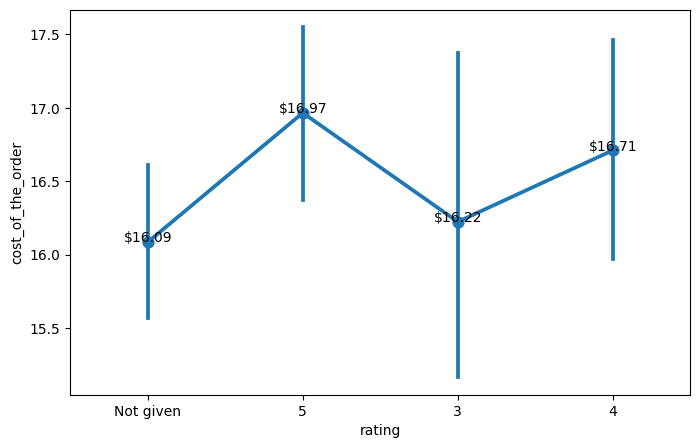

In [ ]:
# Relationship between rating and cost of the order

plt.figure(figsize=(8, 5))
 ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
pointplot = sns.pointplot(x='rating', y='cost_of_the_order', data=df)
mean_values = df.groupby('rating')['cost_of_the_order'].mean().reset_index()

for index, row in mean_values.iterrows():
     plt.text(row['rating'], row['cost_of_the_order'], f"${row['cost_of_the_order']:.2f}",
             color='black', ha="center")

plt.show()

cuisine costing on average $16.90 was not rated.

cuisine costing on average $16.97 was rated at 5

cuisine costing on average $16.22 was rated at 3

Cuisine costing on average $16.71 was rated at 4

It appears that with the average cost of the order being closely clustered around $16 that the rating for cost of the order may be influenced by the quality of the meal rather than anything else

# Correlation among variables

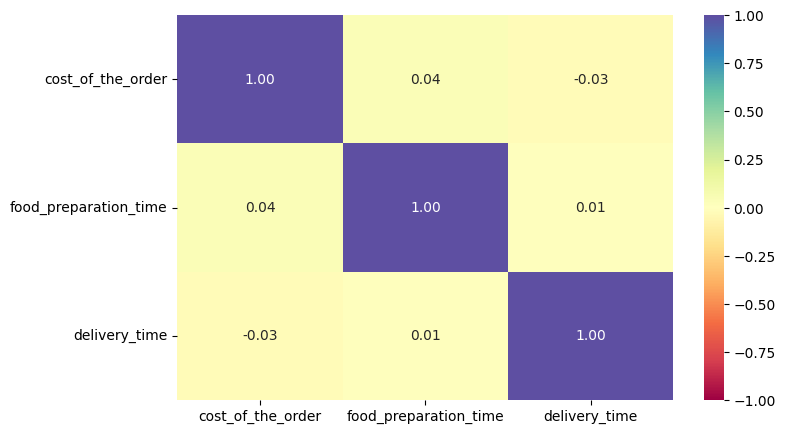

In [ ]:
# Plot the heatmap

col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(8, 5))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

The absolute difference between 0.04 and 1 is |1 - 0.04| = 0.96, and the absolute difference between 0.01 and 1 is |1 - 0.01| = 0.99. Therefore, 0.04 is closer to 1 than 0.01 is, based on their absolute differences from 1.  

There is a closer correlation between cost of the order and food preparation time than delivery time and cost of the order, where the relationship between cost of the order and delivery time is -0.03:

for -0.03
|1- (-0.03)| = |1 + 0.03| = |1.03| = 1.03

for 0.01
|1 - -0.01| = |0.99| = 0.99

The absolute difference shows that 0.01 is closer to 1 than -0.03 is, because 0.99 (the difference between 1 and 0.01) is less than 1.03 (the difference between 1 and -0.03).

# Question 13:

The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
## Complete the code to get the restaurant names having rating count more than 50

rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
## Complete the code to find the mean rating

df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


# Question 14:

The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# get the total revenue and print it
## Write the appropriate function to get the total revenue

total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#Question 15:

The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df_greater_than_60 = df[df['total_time'] >60]


## Write the code below to find the percentage of orders that have more than 60
## minutes of total delivery time (see Question 9 for reference)

percentage_over_60 = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage_over_60, 2), '%')

Percentage of orders above 20 dollars: 10.54 %


# Question 16:
The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Get the mean delivery time on weekdays and print it
## Write the code below to get the mean delivery time on weekends and print it


print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes


#Conclusion and Recommendations

Question 17:

What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

In [ ]:
!pip install nbconvert

Conclusions:
1. Approximately 80% of the orders are for American, Japanese, Italian, and Chinese cuisines, making them the most popular choices of FoodHub customers.

2. Shake Shack is themost popular restaurant that has received the highest number of orders.

3. Order volumes increase on the weekends compared to the weekdays.

4. Delivery time over the weekends is less compared to the weekdays. The reduction in deliveries could be the result of decreased road traffic during the weekends.

5. 38.8% of orders are not rated.

In [ ]:
from nbconvert import HTMLExporter

# Create an HTMLExporter instance
exporter = HTMLExporter()

# Convert the notebook to HTML format
output_html, resources = exporter.from_filename('Low Code FoodHub Case Study.ipynb')

# Write the HTML output to a file
with open('output.html', 'w') as f:
    f.write(output_html)

FileNotFoundError: [Errno 2] No such file or directory: 'Low Code FoodHub Case Study.ipynb'

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
!ls "/content"

'foodhub_order (1).csv'   foodhub_order.csv   sample_data
